In [1]:
#############################################################
# backward example
#############################################################



In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

x = torch.tensor(3.0,  requires_grad=True)
y = x ** 2
y

tensor(9., grad_fn=<PowBackward0>)

In [3]:
y.dim() # y is a scalar tensor

0

In [4]:
y.backward() # scalar tensors can execute backward()
x.grad # df(x)/dx at x=3

tensor(6.)

In [5]:
X = torch.tensor([[3.0], [4.0]],  requires_grad=True)
Y = X ** 2
Y # (2, 1) tensor, not a scalar tensor

tensor([[ 9.],
        [16.]], grad_fn=<PowBackward0>)

In [6]:
Y.dim()

2

In [7]:
# 2D tensor can not execute backward()
try:
    Y.backward() # Y can not execute backward()
except Exception as e:
    print(e)

grad can be implicitly created only for scalar outputs


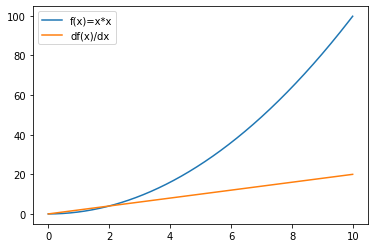

In [8]:
################################################
# Calculate the derivatives of f(X)=x**x
################################################

import torch
import matplotlib.pyplot as plt
import numpy as np

# avoid kernel crash
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

X = torch.arange(0, 10, 0.01, requires_grad=True)
Y = X ** 2
total = Y.sum() # X[0]**2 + X[1]**2 + ... 
total.backward() # scalar tensor
derivatives = X.grad.detach().numpy() # d(total)/dX = (2X[0], 2X[1], ...)

# plot the derivatives
fig, ax = plt.subplots()
ax.plot(X.detach().numpy(), Y.detach().numpy(), label='f(x)=x*x')
ax.plot(X.detach().numpy(), derivatives, label="df(x)/dx")
ax.legend()

plt.show()

In [9]:
import torch
from torch.nn import Linear
from torch import nn, optim
import matplotlib.pyplot as plt

# avoid kernel crash
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

class Network(nn.Module):
    def __init__(self, input_size, output_size):
        super(Network, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, output_size)
            )
    def forward(self, x):
        y = self.seq(x)
        return y

X = torch.tensor([[1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0]]) # (5,1) tensor

# Generate (5,1) noise tensor
mean = 0.0
variance = 0.1
noise = torch.normal(mean, variance, size=X.size())

# label
Y = X ** 2 + noise # (5,1) tensor
noise

tensor([[-0.1057],
        [ 0.0251],
        [-0.0953],
        [-0.0312],
        [-0.0455],
        [ 0.1112],
        [-0.0386],
        [ 0.0878],
        [-0.0029]])

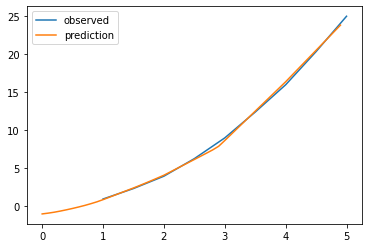

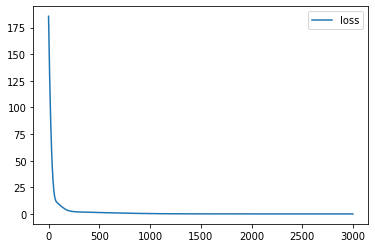

In [16]:
# training
net = Network(1,1)
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
losses = []
for i in range(3000):
    yhat = net(X)
    loss = criterion(yhat, Y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# predict
with torch.no_grad():
    t = torch.tensor(np.arange(0, 5, 0.1), dtype=torch.float32).unsqueeze(1) # (50, 1) tensor
    result = net(t)

# plot prediction
fig, ax = plt.subplots()
ax.plot(X.detach().numpy(), Y.detach().numpy(), label='observed')
ax.plot(t.detach().numpy(), result, label="prediction")
ax.legend()

# plot losses
fig, ax = plt.subplots()
ax.plot(losses, label='loss')
ax.legend()